In [ ]:
# Is the sediment particle type working/helping?

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from stompy.model.fish_ptm import ptm_tools
from stompy.grid import unstructured_grid
%matplotlib notebook

In [2]:
sed_bin=ptm_tools.PtmBin("all_sources/test_sediment/COYOTE_down2000_sed_bin.out")
reg_bin=ptm_tools.PtmBin("all_sources/test_sediment/COYOTE_down2000_bin.out")


In [3]:
tN=sed_bin.count_timesteps()
print(f"{tN} timesteps")

528 timesteps


In [5]:
_,sed_N = sed_bin.read_timestep(525)
_,reg_N = reg_bin.read_timestep(525)

In [6]:
sed_N.shape, reg_N.shape

((4007,), (4007,))

In [7]:
print(pd.DataFrame(dict(status=sed_N['active'])).groupby('status').size())

print(pd.DataFrame(dict(status=reg_N['active'])).groupby('status').size())

# -8: deposited on bed.
# 1: active


status
-8     388
 1    3619
dtype: int64
status
1    4007
dtype: int64


In [ ]:
# what about state output?
# meh.
# flag log should help.
# which does show particles being set to inactive.
# okay - turns out binary output was hardwired to keep status=active.
#  changed that...

In [10]:
g=unstructured_grid.UnstructuredGrid.from_ugrid(
    "/opt2/sfb_ocean/suntans/runs/merge_009-20170601/average.nc_0000.nc")

In [20]:
# nobody is getting killed, but deposited is nonzero?
# no - seems that deposited probably has the same format as concentration.
#fn="all_sources/test_sediment/COYOTE_down2000_sed_deposited.out"
fn="all_sources/test_sediment/COYOTE_down2000_sed_ins_conc.out"
import six
six.moves.reload_module(ptm_tools)

conc=ptm_tools.PtmConcentration(fn)

Range of deposited concentration: 0.000000 to 0.309775


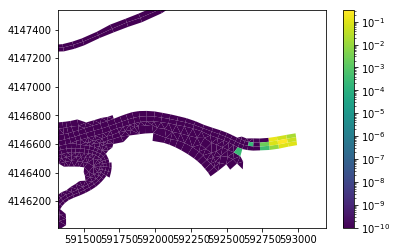

In [21]:
_,data=conc.read_timestep(130)
plt.figure()
from matplotlib.colors import LogNorm
ccoll=g.plot_cells(values=data['conc'].clip(1e-10,np.inf),
                   norm=LogNorm())
print("Range of concentration: %f to %f"%(data['conc'].min(),
                                          data['conc'].max()))
plt.axis('equal')
plt.axis( (591322.7817685178, 593196.0938104563, 4146075.759225106, 4147471.6788434535) )
#ccoll.set_clim([0,0.01])
plt.colorbar(ccoll)

In [65]:
ptm_hydro=xr.open_dataset(
    "/opt2/sfb_ocean/suntans/runs/merge_009-20170601/ptm_average.nc_0000.nc")

In [78]:
c=42672-1 # printed by ptm as 42672, so probably that's 1-based.
ptm_hydro.Mesh2_face_depth.isel(nMesh2_face=c) # 7!
ptm_hydro.Mesh2_face_depth.isel(nMesh2_face=c+1) # 7.84

ptm_hydro.Mesh2_face_bottom_layer.isel(nMesh2_face=c,nMesh2_data_time=1) # 47
# t=0 => 50
# t=1,2 => 48
# 
ptm_hydro.Mesh2_face_top_layer.isel(nMesh2_face=c,nMesh2_data_time=6)


<xarray.DataArray 'Mesh2_face_top_layer' ()>
array(48.)
Coordinates:
    Mesh2_face_x  float64 ...
    Mesh2_face_y  float64 ...
Attributes:
    long_name:  top most active layer (from either side of edge)
    units:      

<IPython.core.display.Javascript object>


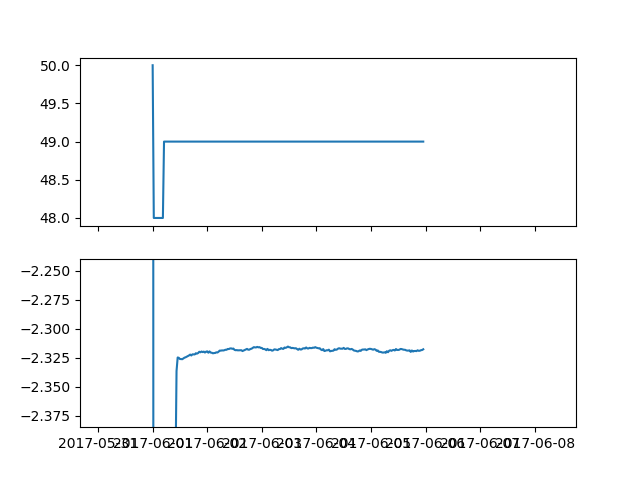

In [81]:
fig,axs=plt.subplots(2,1,sharex=True)

axs[0].plot(ptm_hydro.Mesh2_data_time,
            ptm_hydro.Mesh2_face_top_layer.isel(nMesh2_face=c) )
axs[1].plot(ptm_hydro.Mesh2_data_time,
            ptm_hydro.Mesh2_sea_surface_elevation.isel(nMesh2_face=c))